<a href="https://colab.research.google.com/github/souhila98/Water-Level-Forecasting/blob/main/Household_Power_Consumption_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Set Information:

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).

Notes:

1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
 
2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.


Attribute Information:

1.date: Date in format dd/mm/yyyy

2.time: time in format hh:mm:ss

3.global_active_power: household global minute-averaged active power (in kilowatt)

4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)

5.voltage: minute-averaged voltage (in volt)

6.global_intensity: household global minute-averaged current intensity (in ampere)

7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered)

8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import seaborn as sns
import matplotlib.dates as mdates

from sklearn.preprocessing import StandardScaler, MinMaxScaler

%matplotlib inline

In [ ]:
!pip install pandarallel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.read_csv('/content/household_power_consumption.csv', sep=';', parse_dates=[['Date', 'Time']])

In [ ]:
df.head()

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
print("Start: ", df['Date_Time'].min())
print("End: ", df['Date_Time'].max())

Start:  2006-12-16 17:24:00
End:  2008-12-13 21:38:00


In [ ]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

In [ ]:
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)

def get_rhythm_category(date_time):
  if date_time.hour in [23, 0, 1, 2, 3, 4]:
    return 'SLEEP'
  elif date_time.hour in [5, 6, 7, 8]:
    return 'BREAKFAST'
  elif date_time.hour in [17, 18, 19, 20, 21, 22]:
    return 'DINNER'
  else:
    return 'DAYTIME'

df['Period'] = df['Date_Time'].parallel_apply(get_rhythm_category)

INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [ ]:
df['Date'] = df.Date_Time.dt.date
df['Hour'] = df.Date_Time.dt.hour

In [ ]:
#Set 'Date_Time' as index column
df.set_index('Date_Time', inplace=True)

In [ ]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Period,Date,Hour
Date_Time,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,DINNER,2006-12-16,17
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,DINNER,2006-12-16,17
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,DINNER,2006-12-16,17
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,DINNER,2006-12-16,17
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,DINNER,2006-12-16,17


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1048575 entries, 2006-12-16 17:24:00 to 2008-12-13 21:38:00
Data columns (total 10 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Global_active_power    1048575 non-null  object 
 1   Global_reactive_power  1048575 non-null  object 
 2   Voltage                1048575 non-null  object 
 3   Global_intensity       1048575 non-null  object 
 4   Sub_metering_1         1048575 non-null  object 
 5   Sub_metering_2         1048575 non-null  object 
 6   Sub_metering_3         1044506 non-null  float64
 7   Period                 1048575 non-null  object 
 8   Date                   1048575 non-null  object 
 9   Hour                   1048575 non-null  int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 88.0+ MB


In [ ]:
#Check if there are any rows with empty values
df.isna().sum()

Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3           4069
Period                      0
Date                        0
Hour                        0
dtype: int64

In [ ]:
#Calculate percentage of missing values
na_columns = pd.DataFrame(df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0], columns=['NaN Percentage'])
na_columns['Total NaN'] = df[df.columns[df.isnull().any()]].isnull().sum()
na_columns

,NaN Percentage,Total NaN
Sub_metering_3,0.38805,4069


In [ ]:
#Get rid of missing values as it is only around 5 %
df = df.dropna()
#Maybe it is better to replace tham with median values?

In [ ]:
df['Global_active_power']=df['Global_active_power'].astype(float)
df['Global_reactive_power']=df['Global_reactive_power'].astype(float)
df['Voltage']=df['Voltage'].astype(float)
df['Global_intensity']=df['Global_intensity'].astype(float)
df['Sub_metering_1']=df['Sub_metering_1'].astype(float)
df['Sub_metering_2']=df['Sub_metering_2'].astype(float)
df['Sub_metering_3']=df['Sub_metering_3'].astype(float)

In [ ]:
#df['Hour']=df['Hour'].astype(float)

In [ ]:
#Create new feature for Active energy consumed (global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3)
#df['Active_energy'] = df['Global_active_power']*1000/60 - df['Sub_metering_1'] - df['Sub_metering_2'] - df['Sub_metering_3']

In [ ]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Period', 'Date', 'Hour'],
      dtype='object')

In [ ]:
df.shape

(1044506, 10)

In [ ]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour
count,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06
mean,1.108202e+00,1.182732e-01,2.399598e+02,4.718123e+00,1.177451e+00,1.475177e+00,5.933837e+00,1.150458e+01
std,1.129546e+00,1.095062e-01,3.284504e+00,4.763588e+00,6.321183e+00,6.352703e+00,8.210398e+00,6.923520e+00
min,7.600000e-02,0.000000e+00,2.234900e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.880000e-01,0.000000e+00,2.379700e+02,1.200000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
50%,5.500000e-01,9.800000e-02,2.402100e+02,2.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
75%,1.544000e+00,1.860000e-01,2.421400e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.800000e+01
max,1.067000e+01,1.390000e+00,2.521400e+02,4.640000e+01,8.000000e+01,7.800000e+01,3.100000e+01,2.300000e+01


<AxesSubplot:>

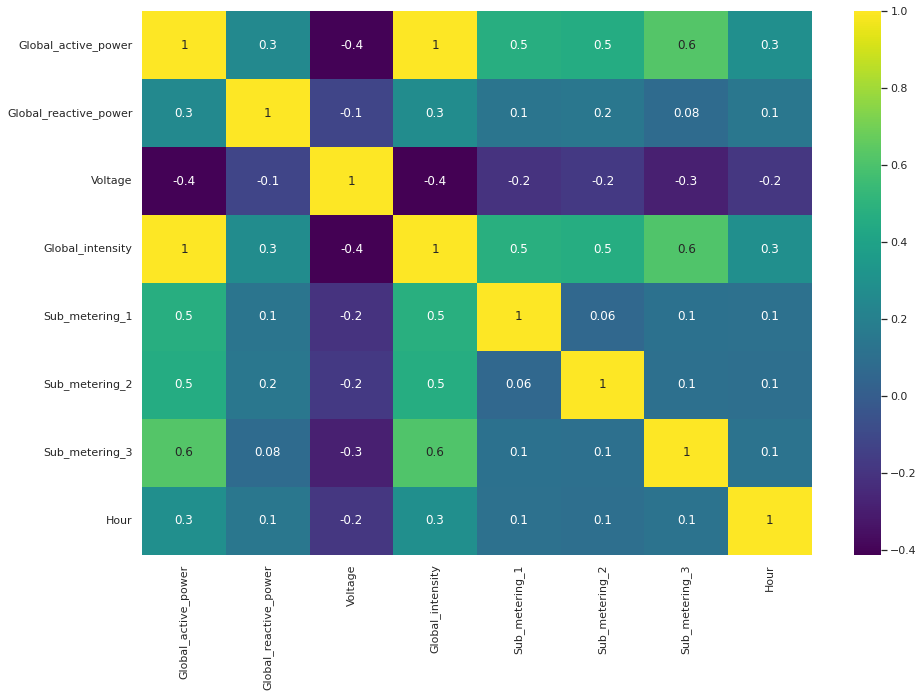

In [ ]:
#Check the correlations between features. 
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap = 'viridis')

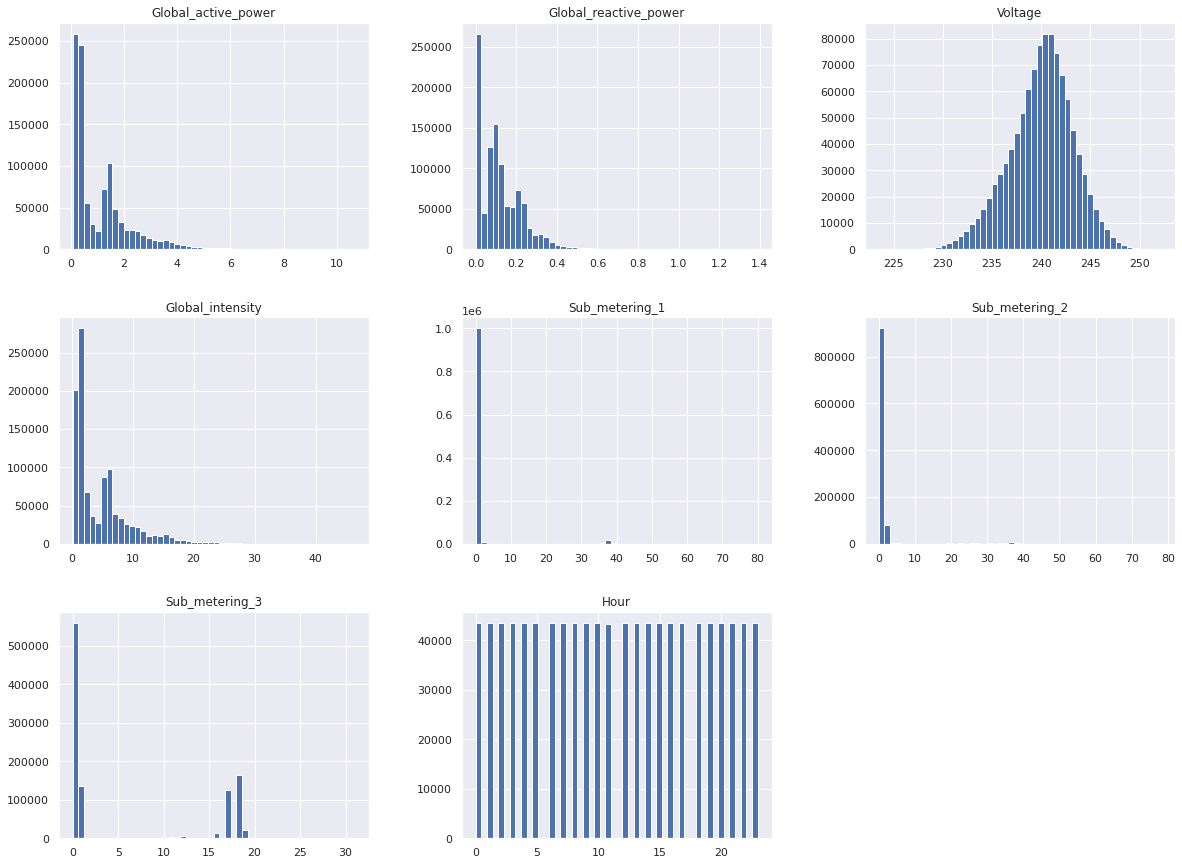

In [ ]:
#Check the distribution of feature values. The distribution is not normal. 'Moisture state' is a binary feature. 
df.hist(bins=50, figsize=(20,15))
plt.show()

'Voltage' distribution is close to normal. Other variable's distributions are skewed.

In [ ]:
#Check for outliers. There is clearly an outlier in 'Temperature', which is, probably, noise from sensor device.
fig = plt.figure(figsize=(15,40))
total_axes = len(df.columns) 
subplt = 1 
for x in df.columns:
    ax = fig.add_subplot(total_axes, 3, subplt)
    df[x].plot(kind='box')
    subplt+=1
plt.show()

<AxesSubplot:title={'center':'Sub_metering_3'}, xlabel='Date_Time'>

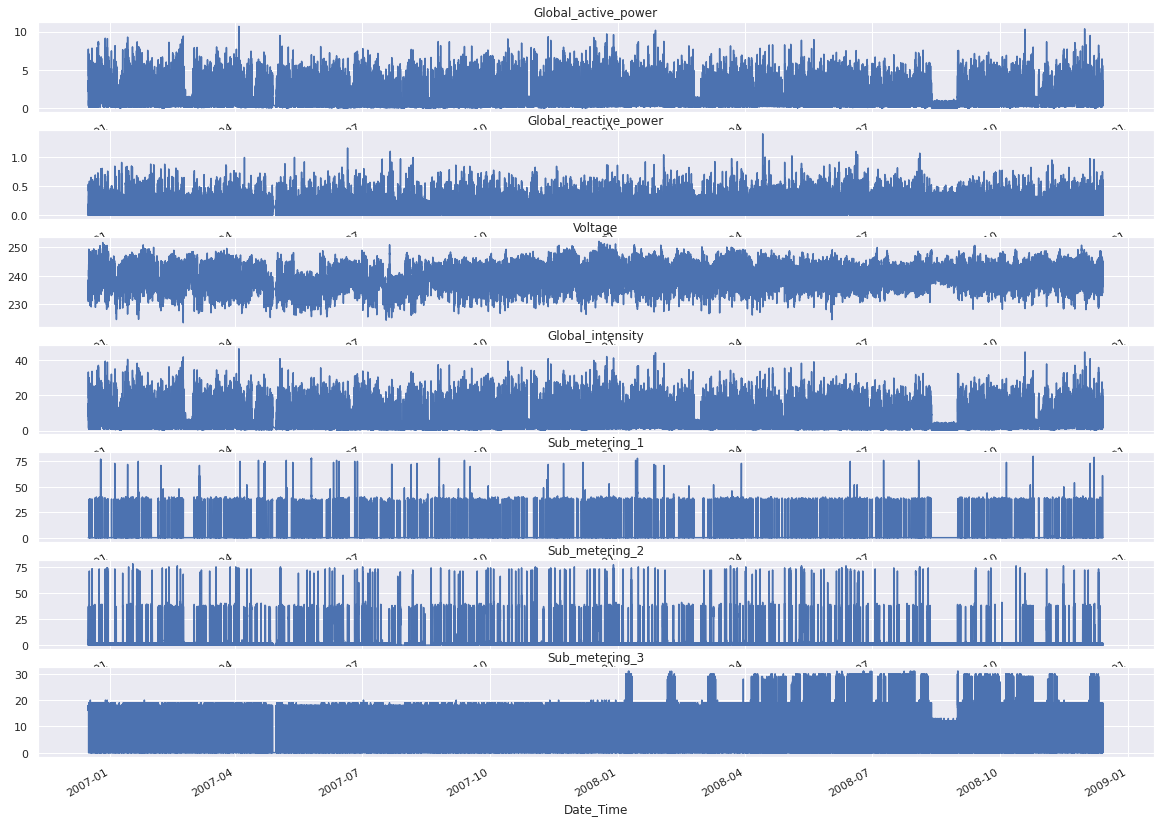

In [ ]:
#Original data
fig, ax = plt.subplots(nrows=7, figsize=[20,15])
df['Global_active_power'].plot(title = 'Global_active_power', ax=ax[0])
df['Global_reactive_power'].plot(title = 'Global_reactive_power', ax=ax[1])
df['Voltage'].plot(title = 'Voltage', ax=ax[2])
df['Global_intensity'].plot(title = 'Global_intensity', ax=ax[3])
df['Sub_metering_1'].plot(title = 'Sub_metering_1', ax=ax[4])
df['Sub_metering_2'].plot(title = 'Sub_metering_2', ax=ax[5])
df['Sub_metering_3'].plot(title = 'Sub_metering_3', ax=ax[6])
#df['Active_energy'].plot(title = 'Active_energy', ax=ax[7])

In [ ]:
#df = df.resample('30T').mean()

In [ ]:
#df.isna().sum()

In [ ]:
#df = df.dropna()

In [ ]:
#Resampled Data
fig, ax = plt.subplots(nrows=7, figsize=[20,15])
df['Global_active_power'].plot(title = 'Global_active_power', ax=ax[0])
df['Global_reactive_power'].plot(title = 'Global_reactive_power', ax=ax[1])
df['Voltage'].plot(title = 'Voltage', ax=ax[2])
df['Global_intensity'].plot(title = 'Global_intensity', ax=ax[3])
df['Sub_metering_1'].plot(title = 'Sub_metering_1', ax=ax[4])
df['Sub_metering_2'].plot(title = 'Sub_metering_2', ax=ax[5])
df['Sub_metering_3'].plot(title = 'Sub_metering_3', ax=ax[6])
#df_resampled['Active_energy'].plot(title = 'Active_energy', ax=ax[7])

In [ ]:
#df1 = df_resampled[(df_resampled.index > '2007-01-01 00:00:00') & (df_resampled.index < '2007-12-31 00:00:00')]

In [ ]:
#fig, ax = plt.subplots(nrows=2, figsize=[20,15])
#df1['Global_active_power'].plot(title = 'Global_active_power', ax=ax[0])
#df1['Active_energy'].plot(title = 'Active_energy', ax=ax[1])

In [ ]:
#df1['Global_active_power'].plot(backend='plotly')

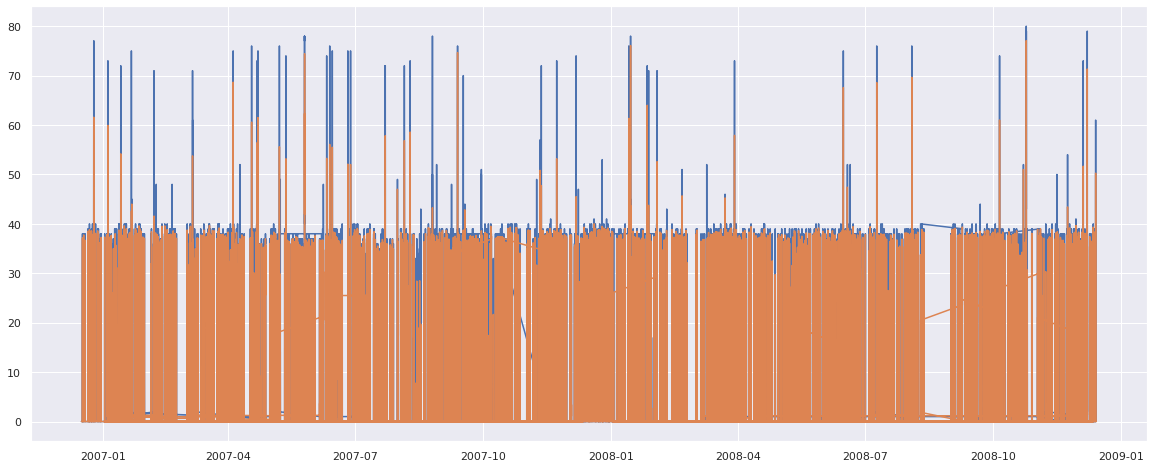

In [ ]:
df['MA12'] = df['Sub_metering_1'].rolling(window=12).mean()

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df[['Sub_metering_1', 'MA12']])

Splitting time-series into 4 periods. Does it matter if we have time laps?



In [ ]:
df_Sleep = df[df['Period'] == 'SLEEP']

In [ ]:
fig, ax = plt.subplots(nrows=3, figsize=[20,15])
df_Sleep['Sub_metering_1'].plot(title = 'Sub_metering_1', ax=ax[0])
df_Sleep['Sub_metering_2'].plot(title = 'Sub_metering_2', ax=ax[1])
df_Sleep['Sub_metering_3'].plot(title = 'Sub_metering_3', ax=ax[2])

Daily Consumption

In [ ]:
df.groupby('Date').Sub_metering_1.sum() 

Date
2006-12-16       0.0
2006-12-17    2033.0
2006-12-18    1063.0
2006-12-19     839.0
2006-12-20       0.0
               ...  
2008-12-09    1867.0
2008-12-10    2561.0
2008-12-11    1066.0
2008-12-12    1157.0
2008-12-13    2186.0
Name: Sub_metering_1, Length: 728, dtype: float64

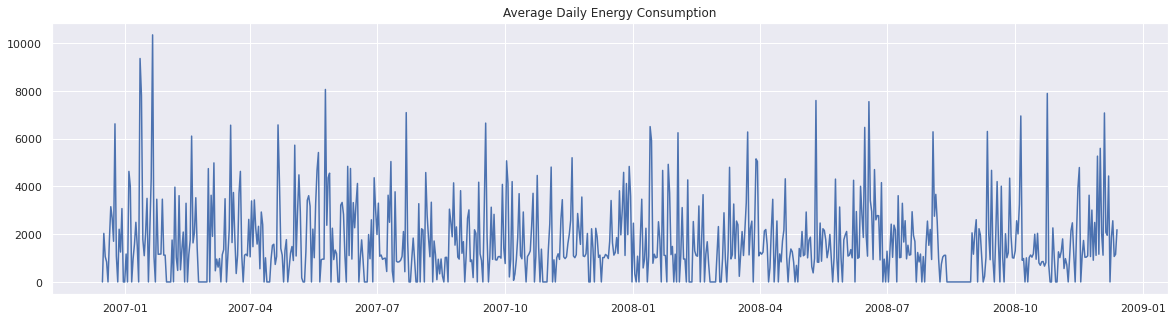

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(df.groupby('Date').Sub_metering_1.sum())
plt.title('Average Daily Energy Consumption')
plt.show()

Period Wise Consumption

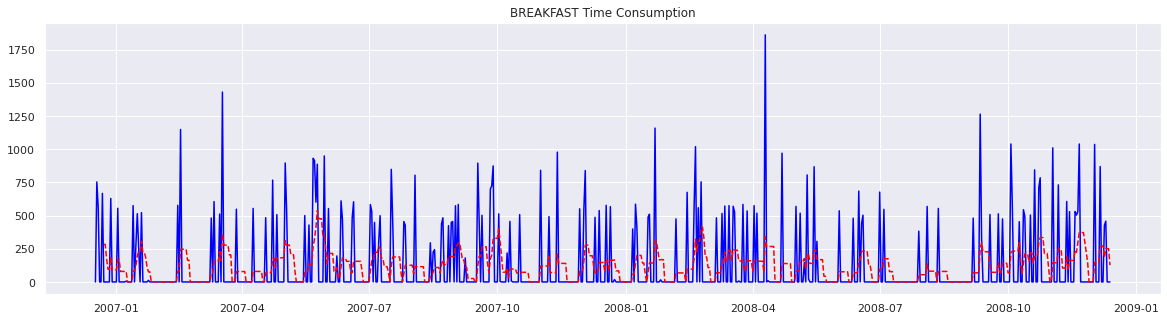

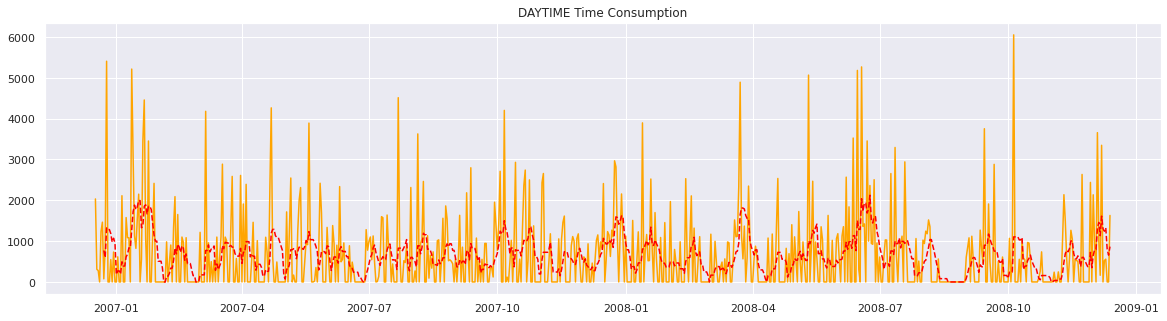

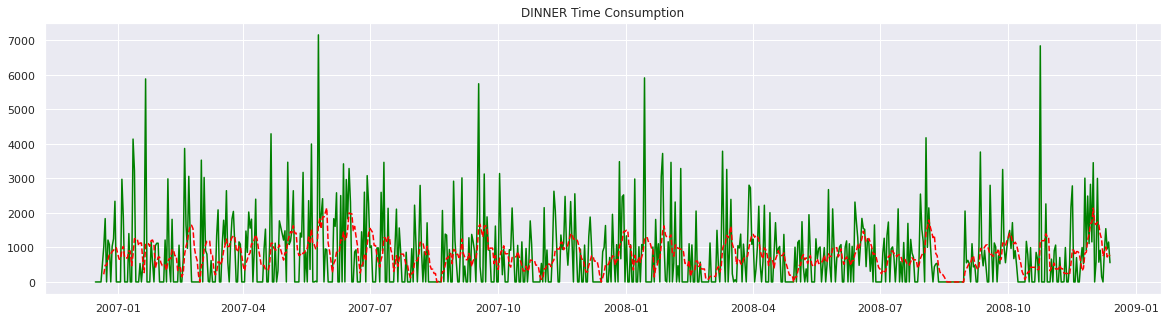

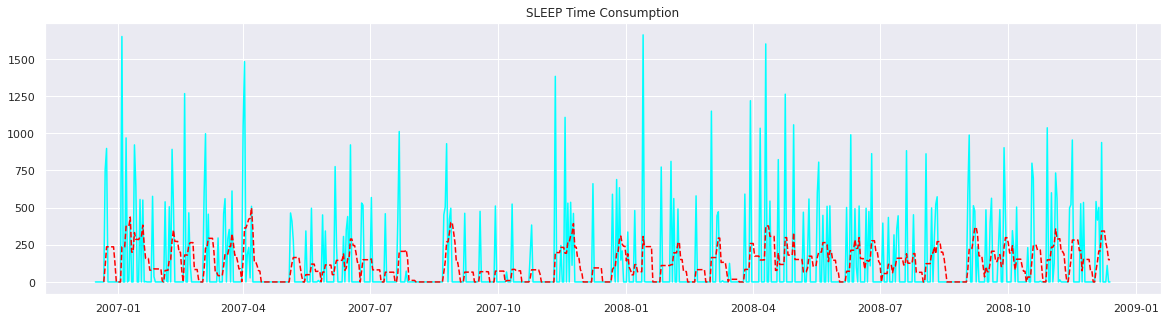

In [ ]:
categories = ['BREAKFAST', 'DAYTIME', 'DINNER', 'SLEEP']
colors = ['blue', 'orange', 'green', 'cyan']
for i in range(4):

  plt.figure(figsize=(20, 5))
  plt.plot(df[(df.Period == categories[i])].groupby(['Date']).Sub_metering_1.sum(), color=colors[i])
  plt.plot(df[(df.Period == categories[i])].groupby(['Date']).Sub_metering_1.sum().rolling(window=7).mean(), 
             color='red', linestyle='dashed')
  plt.title(f'{categories[i]} Time Consumption')
  plt.show()

Export data

Anomaly Detection

In [ ]:
!pip install pyyaml==5.4.1
!pip uninstall scikit-learn -y
!pip install -U pycaret scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found existing installation: scikit-learn 0.23.2
Uninstalling scikit-learn-0.23.2:
  Successfully uninstalled scikit-learn-0.23.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-1.0.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (24.8 MB)
  Using cached scikit_learn-0.23.2-cp37-cp37m-manylinux1_x86_64.whl (6.8 MB)


In [ ]:
!pip install pycaret #[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import zipfile
import warnings
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pycaret.anomaly as canomaly
from google.colab import drive
from pandarallel import pandarallel

warnings.filterwarnings('ignore')
os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [ ]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Period,Date,Hour,MA12
Date_Time,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,DINNER,2006-12-16,17,NaN
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,DINNER,2006-12-16,17,NaN
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,DINNER,2006-12-16,17,NaN
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,DINNER,2006-12-16,17,NaN
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,DINNER,2006-12-16,17,NaN


In [ ]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Period', 'Date', 'Hour', 'MA12'],
      dtype='object')

In [ ]:
data = df[['Sub_metering_1', 'Date', 'Period']]

In [ ]:
data.head()

,Sub_metering_1,Date,Period
Date_Time,,,
2006-12-16 17:24:00,0.0,2006-12-16,DINNER
2006-12-16 17:25:00,0.0,2006-12-16,DINNER
2006-12-16 17:26:00,0.0,2006-12-16,DINNER
2006-12-16 17:27:00,0.0,2006-12-16,DINNER
2006-12-16 17:28:00,0.0,2006-12-16,DINNER


In [ ]:
data = data[(data.index > '2007-01-01 00:00:00') & (data.index < '2007-12-31 00:00:00')]

In [ ]:
data.reset_index(inplace=True)

In [ ]:
# create moving-averages
data['MA12'] = data['Sub_metering_1'].rolling(12).mean()
data['MA672'] = data['Sub_metering_1'].rolling(672).mean()

In [ ]:
fig = px.line(data, x='Date_Time', y=['Sub_metering_1', 'MA12', 'MA672'], title='Sub_metering_1', template = 'plotly_dark')
fig.show()

In [ ]:
# drop moving-average columns
data.drop(['Date', 'MA12', 'MA672'], axis=1, inplace=True)

In [ ]:
# set timestamp (GMT) to index
data.set_index('Date_Time', drop=True, inplace=True)

In [ ]:
data.head()

,Sub_metering_1,Period
Date_Time,,
2007-01-01 00:01:00,0.0,SLEEP
2007-01-01 00:02:00,0.0,SLEEP
2007-01-01 00:03:00,0.0,SLEEP
2007-01-01 00:04:00,0.0,SLEEP
2007-01-01 00:05:00,0.0,SLEEP


In [ ]:
# resample timeseries to hourly 
data = data.resample('H').mean()

In [ ]:
data.isna().sum()

Sub_metering_1    62
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
# creature features from date
# pc_data['day'] = [i.day for i in pc_data.index]
# pc_data['day_name'] = [i.day_name() for i in pc_data.index]
# pc_data['day_of_year'] = [i.dayofyear for i in pc_data.index]
data['week_of_year'] = [i.weekofyear for i in data.index]
# pc_data['hour'] = [i.hour for i in pc_data.index]
data['is_weekday'] = [i.isoweekday() for i in data.index]
data['Period'] = [get_rhythm_category(i) for i in data.index]

In [ ]:
data = data[data['Period'] == 'SLEEP']

In [ ]:
data.head()

,Sub_metering_1,week_of_year,is_weekday,Period
Date_Time,,,,
2007-01-01 00:00:00,0.0,1,1,SLEEP
2007-01-01 01:00:00,0.0,1,1,SLEEP
2007-01-01 02:00:00,0.0,1,1,SLEEP
2007-01-01 03:00:00,0.0,1,1,SLEEP
2007-01-01 04:00:00,0.0,1,1,SLEEP


In [ ]:
#from pycaret.anomaly import *
s = canomaly.setup(data, session_id = 202)

,Description,Value
0,session_id,202
1,Original Data,"(2168, 4)"
2,Missing Values,False
3,Numeric Features,2
4,Categorical Features,2
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(2168, 10)"
9,CPU Jobs,-1


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
        

Model Training

In [ ]:
# check list of available models
canomaly.models()

INFO:logs:gpu_param set to False


,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [ ]:
def detect_anomalies(model_id, fraction, measurement):
    # train model
    od_model = canomaly.create_model(model_id, fraction=fraction, verbose=False)
    od_results = canomaly.assign_model(od_model)
    return od_results

In [ ]:
def show_anomalies(od_results, model_id, measurement):
    print(f"Number of anomalies detected: {od_results[od_results['Anomaly'] == 1].shape[0]}")
    # plot value on y-axis and date on x-axis
    fig = px.line(od_results, x=od_results.index, y=measurement, 
                    title=f'Model: {str(model_id).upper()}', 
                    template = 'plotly_dark')
    # create list of outlier_dates
    outlier_dates = od_results[od_results['Anomaly'] == 1].index
    # obtain y value of anomalies to plot
    y_values = [od_results.loc[i][measurement] for i in outlier_dates]
    fig.add_trace(go.Scatter(x=outlier_dates, y=y_values, mode = 'markers', 
                                name = 'Anomaly', 
                                marker=dict(color='red',size=10)))
    fig.show()

Train Models

In [ ]:
fraction = 0.02
measurement = "Sub_metering_1"
abod_results = detect_anomalies('abod', fraction, measurement)
cluster_results = detect_anomalies('cluster', fraction, measurement)
histogram_results = detect_anomalies('histogram', fraction, measurement)
iforest_results = detect_anomalies('iforest', fraction, measurement)
knn_results = detect_anomalies('knn', fraction, measurement)
lof_results = detect_anomalies('lof', fraction, measurement)

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=abod, num_clusters=4, fraction=0.02, ground_truth=None, round=4, fit_kwargs=None, verbose=False, system=True, add_to_model_list=True, raise_num_clusters=False, experiment_custom_tags=None, display=None, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Importing untrained model
INFO:logs:Angle-base Outlier Detection Imported succesfully
INFO:logs:Fitting Model
INFO:logs:ABOD(contamination=0.02, method='fast', n_neighbors=5)
INFO:logs:create_models() succesfully completed......................................
INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:ABOD(contamination=0.02, method='fast', n_neighbors=5)
INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing assign_model()
INFO:

ABOD

In [ ]:
show_anomalies(abod_results, 'abod', measurement)

Number of anomalies detected: 0


Clustering Based Local Outlier

In [ ]:
show_anomalies(cluster_results, 'cluster', measurement)

Number of anomalies detected: 44


Histogram Based Outlier

In [ ]:
show_anomalies(histogram_results, 'histogram', measurement)

Number of anomalies detected: 44


Isolation Forest

In [ ]:
show_anomalies(iforest_results, 'iforest', measurement)

Number of anomalies detected: 44


KNN

In [ ]:
show_anomalies(knn_results, 'knn', measurement)

Number of anomalies detected: 44


Local Outlier Factor

In [ ]:
show_anomalies(lof_results, 'lof', measurement)

Number of anomalies detected: 44
